In [12]:
import pandas as pd
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Replace 'your_file.xlsx' with your actual file name
file_path1 = r'C:/Users/gargi/Downloads/Moh_Project_Australia - Copy.xlsx'
aus_df = pd.read_excel(file_path1)

# Display the first few rows of the DataFrame
print(aus_df.head())

   No     ID  Unnamed: 2  Unnamed: 3  Topo  Disturbance  Isostatic   Gravity  \
0   1  34298         NaN         NaN    46      -160.29    -11.316  174.9258   
1   2  34299         NaN         NaN    19      -162.22    -20.320  157.2074   
2   3  34300         NaN         NaN    33      -160.27    -24.496  151.6976   
3   4  34301         NaN         NaN    19      -161.58    -26.552  148.4207   
4   5  34302         NaN         NaN     7      -161.95    -18.569  149.7591   

       X     Y  
0  113.0 -25.8  
1  113.5 -25.8  
2  113.6 -25.8  
3  113.7 -25.8  
4  114.2 -25.8  


C:\Users\gargi\AppData\Local\Temp\ipykernel_18088\3477435077.py:51: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


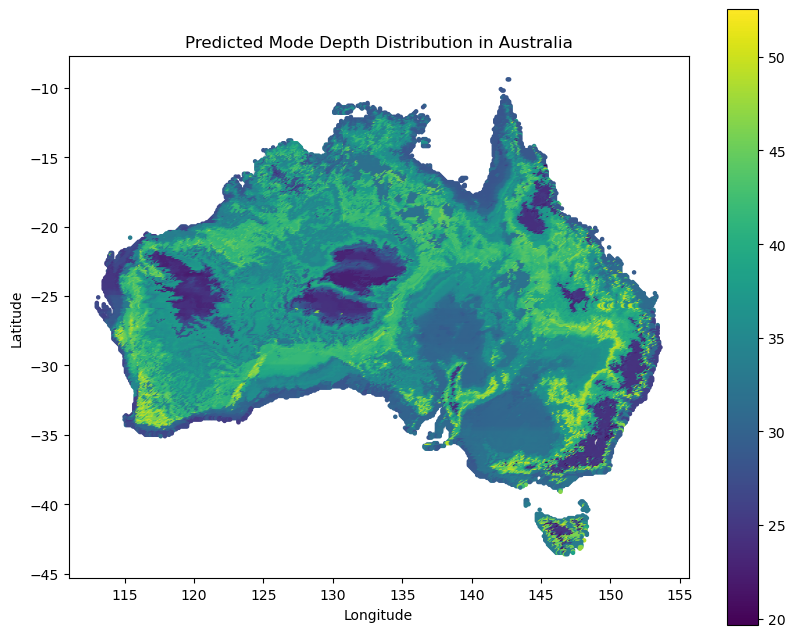

In [8]:
import pandas as pd
import numpy as np
import pickle
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Load the new dataset without the target variable
file_path = r'C:/Users/gargi/Downloads/Moh_Project_Australia - Copy.xlsx'
aus_df = pd.read_excel(file_path)

# Assuming 'aus_df' is your DataFrame containing the new dataset
# Preprocessing the new dataset
# Drop unnecessary columns (e.g., ID)
X = aus_df.drop(columns=['No', 'ID', 'Unnamed: 2', 'Unnamed: 3'])

# Create a StandardScaler object for features
scaler_X = StandardScaler()
X_scaled_new = scaler_X.fit_transform(X)

# Load the KMeans model used for the original dataset
with open("kmeans.pkl", 'rb') as f:
    kmeans = pickle.load(f)

# Apply K-means clustering to identify segments based on the feature space
clusters_new = kmeans.predict(X_scaled_new)

# Save the cluster labels to the DataFrame
aus_df['Cluster'] = clusters_new

# Load the pretrained Random Forest regression models from the pickle file
with open("models_random_forest.pkl", 'rb') as f:
    models = pickle.load(f)

# Predict mode depth for the new dataset
y_pred_new = np.zeros(len(aus_df))
for i, model in enumerate(models):
    cluster_data_new = X_scaled_new[clusters_new == i]  # Selecting data for the cluster
    y_pred_new[clusters_new == i] = model.predict(cluster_data_new)  # Predict mode depth for the cluster

# Add the predicted mode depth as a new column in the DataFrame
aus_df['Predicted Mode Depth'] = y_pred_new

# Convert latitude and longitude to Points
geometry = [Point(xy) for xy in zip(aus_df['X'], aus_df['Y'])]
gdf = gpd.GeoDataFrame(aus_df, geometry=geometry)

# Plot the map of Australia
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
australia = world[world['name'] == 'Australia']  # Filter Australia polygon
fig, ax = plt.subplots(figsize=(10, 8))
australia.plot(ax=ax, color='lightgrey')  # Plot Australia map
gdf.plot(ax=ax, column='Predicted Mode Depth', cmap='viridis', markersize=5, legend=True)  # Plot data points with predicted mode depth

plt.title('Predicted Mode Depth Distribution in Australia')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()
